In [260]:
import pandas as pd
import numpy as np

In [262]:
df=pd.read_csv('heart.csv')

In [264]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
615,70,M,ASY,130,322,0,LVH,109,N,2.4,Flat,1
134,61,F,ASY,130,294,0,ST,120,Y,1.0,Flat,0
503,51,M,ASY,132,227,1,ST,138,N,0.2,Up,0
700,42,M,TA,148,244,0,LVH,178,N,0.8,Up,0
374,61,M,ASY,125,0,0,Normal,105,Y,0.0,Down,1


In [266]:
df.shape

(918, 12)

In [268]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Treating Outliers

<Axes: ylabel='RestingBP'>

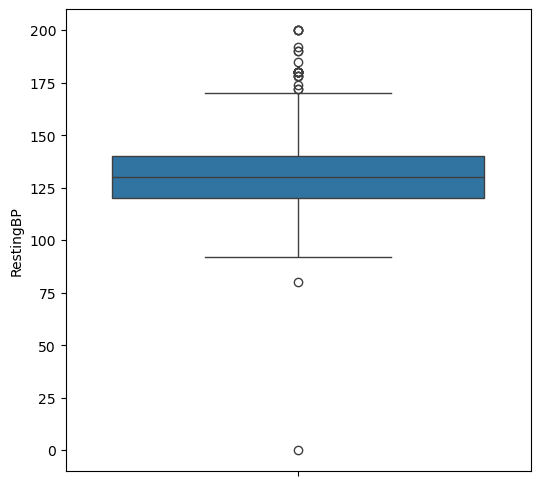

In [270]:
import seaborn as sbn
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sbn.boxplot(df['RestingBP'])

In [272]:
df=df[df['RestingBP']<(3*df['RestingBP'].std())+df['RestingBP'].mean()] #Z_score

<Axes: ylabel='Cholesterol'>

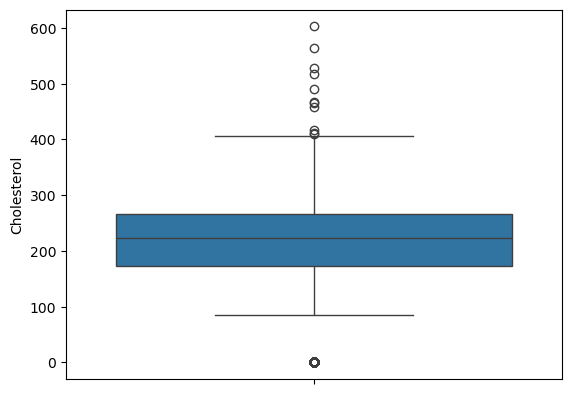

In [274]:
sbn.boxplot(df['Cholesterol'])

In [276]:
df['Cholesterol']=df['Cholesterol'].apply(lambda x: df['Cholesterol'].mean() if x==0 else x)

<Axes: ylabel='FastingBS'>

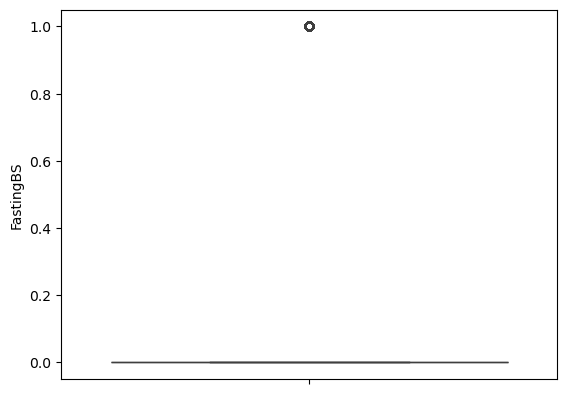

In [278]:
sbn.boxplot(df['FastingBS'])

In [280]:
df.drop(['FastingBS'],axis=1,inplace=True)

<Axes: ylabel='MaxHR'>

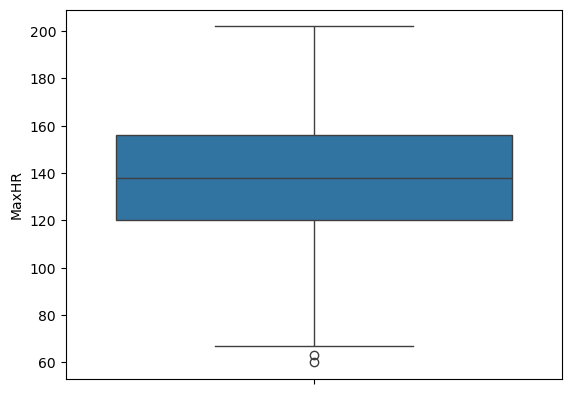

In [282]:
sbn.boxplot(df['MaxHR']) # does not have outliers from the plot

<Axes: ylabel='Oldpeak'>

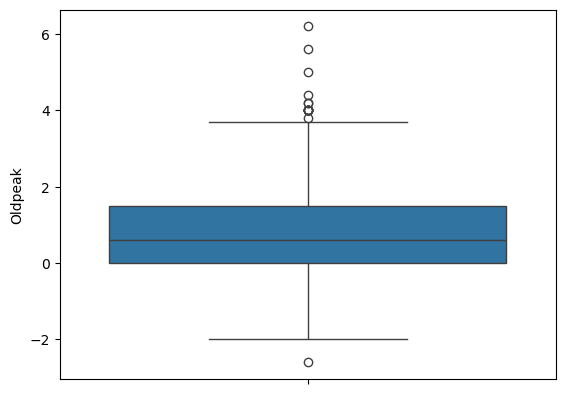

In [284]:
sbn.boxplot(df['Oldpeak'])

In [286]:
df=df[df['Oldpeak']<3*df['Oldpeak'].std()+df['Oldpeak'].mean()] #Z_score

In [288]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,Normal,122,N,0.0,Up,0


In [290]:
df['Sex']=df['Sex'].apply(lambda x: 1 if x=='M'else 0)

In [292]:
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())
print(df['ST_Slope'].value_counts())
print(df['ExerciseAngina'].value_counts())

ChestPainType
ASY    487
NAP    202
ATA    171
TA      45
Name: count, dtype: int64
RestingECG
Normal    547
LVH       183
ST        175
Name: count, dtype: int64
ST_Slope
Flat    455
Up      393
Down     57
Name: count, dtype: int64
ExerciseAngina
N    541
Y    364
Name: count, dtype: int64


In [294]:
df['RestingECG']=df['RestingECG'].apply(lambda x: 1 if x=='Normal'else(2 if x=='LVH' else 3))
df['ST_Slope']=df['ST_Slope'].apply(lambda x: 1 if x=='Flat'else(2 if x=='Up' else 3))

In [296]:
df['ExerciseAngina']=df['ExerciseAngina'].apply(lambda x:0 if x=='N'else 1 )

In [298]:
#one hot encoding for ChestPainType
dummies=pd.get_dummies(df['ChestPainType']).astype(int)

In [300]:
df_new=pd.concat([dummies,df],axis=1)

In [302]:
df_new

,ASY,ATA,NAP,TA,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,1,0,0,40,1,ATA,140,289.0,1,172,0,0.0,2,0
1,0,0,1,0,49,0,NAP,160,180.0,1,156,0,1.0,1,1
2,0,1,0,0,37,1,ATA,130,283.0,3,98,0,0.0,2,0
3,1,0,0,0,48,0,ASY,138,214.0,1,108,1,1.5,1,1
4,0,0,1,0,54,1,NAP,150,195.0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,0,0,1,45,1,TA,110,264.0,1,132,0,1.2,1,1
914,1,0,0,0,68,1,ASY,144,193.0,1,141,0,3.4,1,1
915,1,0,0,0,57,1,ASY,130,131.0,1,115,1,1.2,1,1
916,0,1,0,0,57,0,ATA,130,236.0,2,174,0,0.0,1,1


In [304]:
df_new=df_new.drop(['ASY','ChestPainType'],axis=1) # to avoid dummy trap

In [306]:
df_new

,ATA,NAP,TA,Age,Sex,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,0,0,40,1,140,289.0,1,172,0,0.0,2,0
1,0,1,0,49,0,160,180.0,1,156,0,1.0,1,1
2,1,0,0,37,1,130,283.0,3,98,0,0.0,2,0
3,0,0,0,48,0,138,214.0,1,108,1,1.5,1,1
4,0,1,0,54,1,150,195.0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,0,1,45,1,110,264.0,1,132,0,1.2,1,1
914,0,0,0,68,1,144,193.0,1,141,0,3.4,1,1
915,0,0,0,57,1,130,131.0,1,115,1,1.2,1,1
916,1,0,0,57,0,130,236.0,2,174,0,0.0,1,1


In [314]:
Y=df_new['HeartDisease']
X=df_new.drop(['HeartDisease'],axis=1)

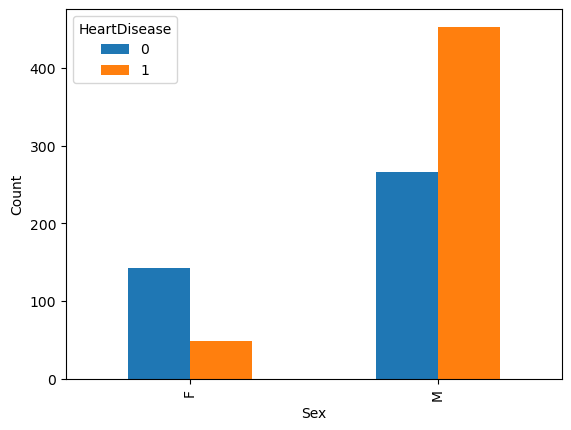

In [107]:
pd.crosstab(df['Sex'],df['HeartDisease']).plot(kind='bar')
plt.ylabel('Count');

<Axes: xlabel='Cholesterol', ylabel='Count'>

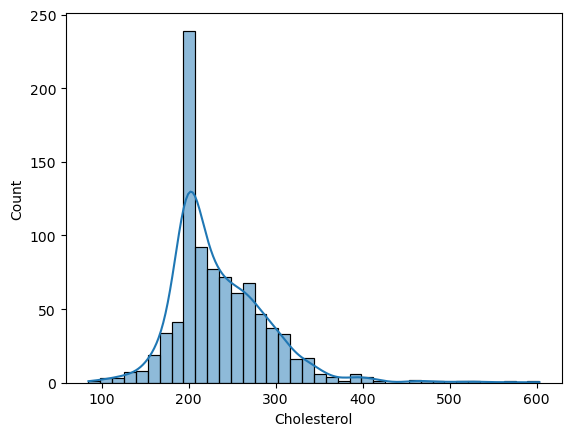

In [308]:
sbn.histplot(data=df,x='Cholesterol',kde=True)

In [312]:
from sklearn.model_selection import train_test_split

In [316]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

In [320]:
from sklearn import linear_model

In [322]:
model=linear_model.LogisticRegression()

In [318]:
from sklearn.model_selection import cross_val_score

In [328]:
cross_val_score(model,X,Y,cv=6)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.81456954, 0.8013245 , 0.8410596 , 0.7615894 , 0.83443709,
       0.82666667])

In [395]:
from sklearn.preprocessing import StandardScaler

In [397]:
scaler=StandardScaler()

In [399]:
x_scale=scaler.fit_transform(X)

In [330]:
from sklearn.decomposition import PCA

In [420]:
model1=PCA(0.95)

In [422]:
xpca=model1.fit_transform(x_scale)

In [424]:
model1.n_components_

11

In [426]:
xpca.shape

(905, 11)

In [428]:
xpca

array([[-2.57925307, -1.39455654, -0.86408607, ...,  0.30833354,
         0.16521262,  0.04568871],
       [-0.72347874,  0.63552711,  2.19321247, ..., -2.26023722,
        -0.05072221, -0.45404011],
       [-1.16157716, -1.21962111, -1.15175582, ...,  0.94127289,
        -0.65489926, -1.69893262],
       ...,
       [ 1.58522218,  1.0597701 , -1.49064166, ..., -1.08520725,
        -0.10716992,  0.45624656],
       [-1.90256415, -1.85279947,  0.41491292, ..., -1.26140339,
         1.07085979,  0.9120103 ],
       [-2.0484364 ,  2.08939141,  0.66656926, ..., -0.68266877,
        -0.51334107, -0.07263976]])

In [430]:
Ytrain

214    1
30     1
671    1
750    0
130    0
      ..
4      0
27     0
338    1
354    1
366    1
Name: HeartDisease, Length: 633, dtype: int64

In [432]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(xpca,Y,test_size=0.3)

In [434]:
model.fit(Xtrain,Ytrain)

LogisticRegression()

In [436]:
model.score(Xtest,Ytest)

0.8492647058823529